# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.columns.values

array(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors',
       'volunteer', 'military', 'empholes', 'occupspecific', 'occupbroad',
       'workinschool', 'email', 'computerskills', 'specialskills',
       'firstname', 'sex', 'race', 'h', 'l', 'call', 'city', 'kind',
       'adid', 'fracblack', 'fracwhite', 'lmedhhinc', 'fracdropout',
       'fraccolp', 'linc', 'col', 'expminreq', 'schoolreq', 'eoe',
       'parent_sales', 'parent_emp', 'branch_sales', 'branch_emp', 'fed',
       'fracblack_empzip', 'fracwhite_empzip', 'lmedhhinc_empzip',
       'fracdropout_empzip', 'fraccolp_empzip', 'linc_empzip', 'manager',
       'supervisor', 'secretary', 'offsupport', 'salesrep', 'retailsales',
       'req', 'expreq', 'comreq', 'educreq', 'compreq', 'orgreq', 'manuf',
       'transcom', 'bankreal', 'trade', 'busservice', 'othservice',
       'missind', 'ownership'], dtype=object)

In [39]:
call_w = data[data['race']=='w'].call
call_b = data[data['race']=='b'].call
print(np.mean(call_w))
print(np.mean(call_b))

0.09650924056768417
0.0644763857126236


Do a bootstrap test to determine the variance and see overlap

The Null hypothesis is that there is no difference between the groups and the data will be a within the mean variation.

The alternative hypothesis is that there is at least some possibility the the black named group is being differently treated than the white group.

The appropriate test is a bootstrap test where the test is bootstrapped (or done a lot of times and see how many times it is outside of the control dataset with both together)

In [32]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(call_w)-np.mean(call_b)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((call_w,call_b)))

# Generate shifted data sets
call_w_shifted = call_w - np.mean(call_w) + mean_count
call_b_shifted = call_b - np.mean(call_b) + mean_count

# Generate bootstrap replicates
bs_reps_call_w = draw_bs_reps(call_w_shifted, np.mean, size=100000)
bs_reps_call_b = draw_bs_reps(call_b_shifted, np.mean, size=100000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_call_w-bs_reps_call_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(call_w) - np.mean(call_b)) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


The p-value of the call back variation being random is 0, based on our bootstrap test with a high number of repetitions. because the p-value is less than the alpha of .025 the null hypothesis is confirmed and the data white and black data have different means.

[ 0.06529772  0.09568787]
0.09650924056768417
0.0644763857126236


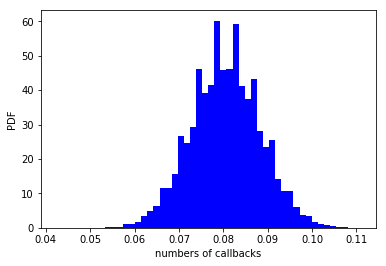

In [40]:
bs_mean = np.percentile(bs_replicates+mean_count,[2.5,97.5])
print(bs_mean)
print(np.mean(call_w))
print(np.mean(call_b))

# Plot the histogram
_ = plt.hist(bs_replicates+mean_count, bins=50, normed=True,color='blue')
_ = plt.xlabel('numbers of callbacks')
_ = plt.ylabel('PDF')
plt.show()

There is less than a 2.5% margin of error, because the racially divergent data is outside the confidence interval of 95% on both the white and black sides. The confidence interval is from .06529772 to .09568787 and both the white and black selections are both outside at 0.0644763857126236 and 0.09650924056768417. There are less than 2.5% of random selections that would divid the data in such a way.

 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The null hypothesis that there are different means was confirmed, so race is a factor in call back rate (there are a different means for each skin color).

The margin of error being so small shows that there is almost definately a difference caused by the racial bias caused by the names a 2.5% chance of random error being more extreme is tiny and the magnitude of the difference show its large effect.

Race is likely one of the most influencial factors in callback sucess, with 2.5% of outcomes being more extreme it is possible that annother factor could influence the results more. It is likely that the more extreme cases of variation would have race and another influencial factor in conjunction. You could test the influence of other columns and see if splitting any other columns have an even greater diviation from the mean. The first columns I would check would be based on previous experience.